# <center> Taller 1</center>
<center>Grupo 3</center>
<center>Daniel Mayor y Johan Ayala</center>

## Ejercicio 1

Hacer una exploración por las siguientes variables que permita entender ¿qué miden? ¿qué categorías
admiten? ¿Cómo afecta el problema que nos compete?

In [1]:
contraseña="23y7#+t6gCG_eZy"

In [2]:
import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)

client = Socrata("www.datos.gov.co","vONPsUHk0x930twQ9StlHQKi6",
                  username="jsaj360@gmail.com",
                  password=contraseña)
query='''
select orden,rama,departamento,tipo_de_contrato,estado_contrato,es_pyme
limit 1500000
'''


base = client.get("jbjy-vk9h", query=query)
base1 = pd.DataFrame.from_records(base)


In [3]:
base1.shape

(1442353, 6)

In [4]:
variables=['orden','rama','departamento','tipo_de_contrato','estado_contrato','es_pyme']
for a in range(len(variables)):
    print(variables[a],base1[variables[a]].unique())
    print('.....')

orden ['Nacional' 'Territorial' 'Corporación Autónoma' 'No Definido']
.....
rama ['Ejecutivo' 'Corporación Autónoma' 'Legislativo' 'Judicial' 'No Definido']
.....
departamento ['Antioquia' 'Distrito Capital de Bogotá' 'Guaviare' 'Magdalena'
 'Risaralda' 'Vichada' 'Cundinamarca' 'Valle del Cauca' 'Atlántico'
 'Norte de Santander' 'Putumayo' 'Tolima' 'Bolívar' 'Caquetá' 'Casanare'
 'Cesar' 'La Guajira' 'Boyacá' 'No Definido' 'Santander' 'Huila' 'Córdoba'
 'Cauca' 'Meta' 'Nariño' 'Quindío' 'Caldas'
 'San Andrés, Providencia y Santa Catalina' 'Chocó' 'Arauca' 'Sucre'
 'Guainía' 'Amazonas' 'Vaupés']
.....
tipo_de_contrato ['Prestación de servicios' 'Compraventa' 'Arrendamiento de inmuebles'
 'Otro' 'DecreeLaw092/2017' 'Obra' 'Suministros'
 'Asociación Público Privada' 'Acuerdo Marco de Precios' 'Interventoría'
 'Comodato' 'Seguros' 'No Especificado' 'Consultoría' 'Emprestito'
 'Servicios financieros' 'Arrendamiento de muebles' 'Comisión'
 'Venta muebles' 'Concesión' 'Negocio fiduciario' 'Ve

In [7]:
base1.describe()

,orden,rama,departamento,tipo_de_contrato,estado_contrato,es_pyme
count,1442353,1442353,1442353,1442353,1442353,1442353
unique,4,5,34,23,11,2
top,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,No
freq,802040,1241819,718304,1211714,477791,1192360


## Interpretación de resultados ejercicio 1

En la base de datos del secop ii, las variables de interés permiten medir la siguiente información:

Orden: son las entidades cuyo campo de acción es el respectivo territorio, entendido como municipio, distrito o departamento. 

Rama: corresponden a las actividades administrativas que están al servicio de los intereses generales para el cumplimiento de los fines esenciales del estado.

Departamento: el dominio geográfico donde se celebra cada contrato de las personas naturales o las empresas adscritas a cada entidad del estado.

Tipo de contrato: la naturaleza del contrato que se celebra con cada entidad del estado.

Estado del contrato: si los contratos celebrados por cada entidad del estado están iniciado su ejecución, suspendido, prorrogado o finalizado.

Pyme: si las personas naturales o juridicas pertenecen a empresas menores a 10 empleaodos.

Las variables de análisis son de naturaleza categóricas.

Para abordar el problema del comportamiento de inversión en el sector defensa permite realizar un perfilamiento de cada contrato celebrado y que tipo de contratos se ejecutan por cada dominio geográfico
   


## Ejercicio 2

Crear un reporte (con un miniaplicativo incluido) que permita visualizar lo siguiente:

• Suma de valores de contratos del sector defensa por departamento según un rango de fechas que
use la fecha de inicio de contratos. Facilitar la consulta en regiones por año.

• En el reporte anterior incluir cantidad de contratos por región, también deben visualizarse los
contratos que no posean fecha de inicio ¿Cúantos son?

• Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor.

In [8]:
query='''
select orden,rama,departamento,tipo_de_contrato,estado_contrato,sector,valor_del_contrato,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato

where sector =='defensa'
limit 1500000
'''

base = client.get("jbjy-vk9h", query=query)
base2 = pd.DataFrame.from_records(base)

In [9]:
base2.head()

,orden,rama,departamento,tipo_de_contrato,estado_contrato,sector,valor_del_contrato,fecha_de_fin_del_contrato,fecha_de_inicio_del_contrato
0,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Activo,defensa,6121332,2021-07-15T00:00:00.000,NaN
1,Nacional,Ejecutivo,Risaralda,Arrendamiento de inmuebles,Activo,defensa,1479600,2018-09-04T00:00:00.000,2017-09-05T00:00:00.000
2,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,defensa,37287308,2022-12-23T00:00:00.000,2022-01-12T00:00:00.000
3,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,defensa,27500000,2021-12-31T00:00:00.000,2021-02-15T00:00:00.000
4,Nacional,Ejecutivo,Distrito Capital de Bogotá,Compraventa,Activo,defensa,4250000,2019-12-31T00:00:00.000,2019-03-08T00:00:00.000


In [10]:
## transformar la fecha
fecha = base2['fecha_de_inicio_del_contrato'].str.split('T',expand=True)
fecha.columns = ['fecha_de_inicio_del_contrato', 'hora']
ano = fecha['fecha_de_inicio_del_contrato'].str.split('-',expand=True)
ano.columns = ['año', 'mes','dia']
base2=base2.drop(['fecha_de_inicio_del_contrato'],axis=1)
base2=base2.drop(['fecha_de_fin_del_contrato'],axis=1)
base2 = pd.concat([base2, fecha], axis=1)
base2 = pd.concat([base2, ano], axis=1)
base2=base2.drop(['hora'],axis=1)
base2=base2.drop(['mes'],axis=1)
base2=base2.drop(['dia'],axis=1)
base2

,orden,rama,departamento,tipo_de_contrato,estado_contrato,sector,valor_del_contrato,fecha_de_inicio_del_contrato,año
0,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Activo,defensa,6121332,NaN,NaN
1,Nacional,Ejecutivo,Risaralda,Arrendamiento de inmuebles,Activo,defensa,1479600,2017-09-05,2017
2,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,defensa,37287308,2022-01-12,2022
3,Nacional,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,defensa,27500000,2021-02-15,2021
4,Nacional,Ejecutivo,Distrito Capital de Bogotá,Compraventa,Activo,defensa,4250000,2019-03-08,2019
...,...,...,...,...,...,...,...,...,...
113163,Territorial,Ejecutivo,Atlántico,Prestación de servicios,terminado,defensa,56030181,2020-11-23,2020
113164,Nacional,Ejecutivo,Distrito Capital de Bogotá,Compraventa,En aprobación,defensa,33948000,2017-11-27,2017
113165,Nacional,Corporación Autónoma,Distrito Capital de Bogotá,Prestación de servicios,Borrador,defensa,29942000,NaN,NaN
113166,Nacional,Ejecutivo,Guaviare,Prestación de servicios,terminado,defensa,27313970,2020-07-27,2020


In [11]:
## Transformar en numero el valor de contrato
base2['valor_del_contrato']=base2['valor_del_contrato'].apply(pd.to_numeric)

In [13]:
### aplicativo para el informe

inferior=input('Digite la fecha de inicio, recuerde que el formato es AAAA-MM-DD ')
superior=input('Digite la fecha de termino, si no desea poner alguna fecha final porfavor poner no ')
atipicos=input('Desea excluir datos atipicos, poner si o no ')

## punto de corte 
import numpy as np
corte = np.percentile(base2['valor_del_contrato'], 80)
corte

## contar el numero de valores faltantes
print('El numero de contratos sin fecha de inicio es ',base2.fecha_de_inicio_del_contrato.isnull().sum())


## cortar los atipicos
if atipicos== 'si':
    a=base2[base2["valor_del_contrato"]<=corte]
else:
    a=base2
    

## rangos de fechas
b=a[a["fecha_de_inicio_del_contrato"]>=inferior]
if superior=='no':
    b=b
else:
    b=b[b["fecha_de_inicio_del_contrato"]<=superior]
    
# Suma del valor del contrato por año y region

d=b[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).sum().reset_index()
print('El valor de los contratos por año y departamento es')

d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)



Digite la fecha de inicio, recuerde que el formato es AAAA-MM-DD 2020-02-01
Digite la fecha de termino, si no desea poner alguna fecha final porfavor poner no no
Desea excluir datos atipicos, poner si o no si
El numero de contratos sin fecha de inicio es  8944
El valor de los contratos por año y departamento es


año,2020,2021,2022,2030
departamento,,,,
Amazonas,2.314029e+09,1.665115e+09,0.000000e+00,0.0
Antioquia,7.009797e+09,9.597825e+09,9.020000e+07,0.0
Arauca,2.565383e+09,2.488837e+09,0.000000e+00,0.0
Atlántico,6.374683e+09,9.618021e+09,2.031210e+09,0.0
Bolívar,7.442892e+09,1.252252e+10,2.106784e+08,0.0
Boyacá,5.082777e+09,6.295789e+09,3.080000e+07,0.0
Caldas,3.914157e+09,4.427498e+09,0.000000e+00,0.0
Caquetá,6.751379e+09,6.605961e+09,0.000000e+00,0.0
Casanare,3.264349e+09,2.459024e+09,0.000000e+00,0.0


In [61]:
## contar la cantidad de contratos por departamento

d=b[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).count().reset_index()
print('La cantidad de contratos por año y departamento es')
d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)

La cantidad de contratos por año y departamento es


año,2021,2022,2030
departamento,,,
Amazonas,75.0,0.0,0.0
Antioquia,389.0,2.0,0.0
Arauca,115.0,0.0,0.0
Atlántico,454.0,67.0,0.0
Bolívar,470.0,9.0,0.0
Boyacá,336.0,1.0,0.0
Caldas,235.0,0.0,0.0
Caquetá,294.0,0.0,0.0
Casanare,115.0,0.0,0.0


In [29]:
base2['valor_del_contrato'].describe()

count     113168
unique     50778
top            0
freq        1684
Name: valor_del_contrato, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafc52ba1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafc52ba880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafc529ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafc52baf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafc52cc2e0>],
 'means': []}

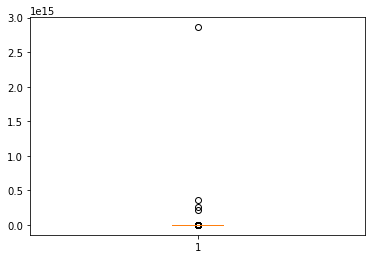

In [15]:
import matplotlib.pyplot as plt 
plt.boxplot(base2["valor_del_contrato"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafc4321dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafc43a04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafc4321a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafc43a0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafc43a0ee0>],
 'means': []}

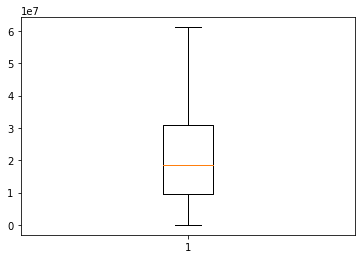

In [14]:
import matplotlib.pyplot as plt 
import numpy as np
corte = np.percentile(base2['valor_del_contrato'], 80)
a=base2[base2["valor_del_contrato"]<=corte]
plt.boxplot(a["valor_del_contrato"])

## Interpretación de resultados ejercicio 2

Para la variable valor de contrato como se puede obervar en el primer box plot, hay valores atípicos que corresponden a números mayores de de 15 cifras. Por lo cual se decide tener el 80% de los datos, dado que los valores no sobre pasan las 8 cifras de valor. 


## Ejercicio 3

Haga un reporte frente a los contratos excluidos. Tenga cuidado con ese rango tan amplio de la
variable Valor del Contrato. Estudie la cantidad de contratos de ese tipo por regiones, explore la
suma del valor del contrato en el tiempo, entre otros.

In [69]:
### los conntratos excluidos son los que estan por encima del percentil 80 de la distribucion del valor del contrato
corte = np.percentile(base2['valor_del_contrato'], 80)

d=a[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).sum().reset_index()
print('El valor de los contratos por año y departamento es')

d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)

El valor de los contratos por año y departamento es


año,2007,2016,2017,2018,2019,2020,2021,2022
departamento,,,,,,,,
Amazonas,0.0,0.000000e+00,1.190322e+09,3.462789e+09,3.101542e+09,3.955233e+09,2.059021e+09,0.000000e+00
Antioquia,322543810.0,0.000000e+00,5.484967e+09,4.250896e+10,5.114093e+10,4.196379e+10,5.324469e+10,0.000000e+00
Arauca,0.0,0.000000e+00,3.754219e+09,5.310705e+09,6.723248e+09,5.054087e+09,5.095525e+09,0.000000e+00
Atlántico,0.0,0.000000e+00,9.645117e+08,1.956334e+10,2.749389e+10,2.941692e+10,4.488015e+10,7.475000e+07
Bolívar,0.0,0.000000e+00,2.446725e+10,2.246578e+10,3.001374e+10,4.371063e+10,5.969787e+10,0.000000e+00
Boyacá,0.0,0.000000e+00,1.151716e+09,1.608350e+10,1.648257e+10,1.742525e+10,1.046337e+10,0.000000e+00
Caldas,0.0,0.000000e+00,8.700328e+08,1.041474e+10,1.269239e+10,1.041067e+10,6.157051e+09,0.000000e+00
Caquetá,0.0,0.000000e+00,7.521661e+08,2.169870e+14,1.712385e+10,1.631244e+10,1.465569e+10,0.000000e+00
Casanare,0.0,0.000000e+00,3.553040e+09,8.412352e+09,8.762307e+09,8.699568e+09,4.041719e+09,0.000000e+00


In [73]:
d=a[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).count().reset_index()
print('La cantidad de los contratos por año y departamento es')

d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)

La cantidad de los contratos por año y departamento es


año,2007,2016,2017,2018,2019,2020,2021,2022
departamento,,,,,,,,
Amazonas,0.0,0.0,5.0,20.0,20.0,18.0,13.0,0.0
Antioquia,1.0,0.0,17.0,162.0,158.0,115.0,139.0,0.0
Arauca,0.0,0.0,6.0,30.0,32.0,24.0,32.0,0.0
Atlántico,0.0,0.0,6.0,48.0,91.0,94.0,101.0,1.0
Bolívar,0.0,0.0,45.0,85.0,104.0,157.0,156.0,0.0
Boyacá,0.0,0.0,6.0,57.0,58.0,56.0,36.0,0.0
Caldas,0.0,0.0,4.0,31.0,30.0,34.0,25.0,0.0
Caquetá,0.0,0.0,5.0,78.0,73.0,69.0,58.0,0.0
Casanare,0.0,0.0,8.0,29.0,33.0,33.0,14.0,0.0


In [71]:
d=a[['estado_contrato','valor_del_contrato','año']].groupby(['estado_contrato','año']).count().reset_index()
d.pivot(index='estado_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2007,2016,2017,2018,2019,2020,2021,2022
estado_contrato,,,,,,,,
Activo,0.0,10.0,340.0,1222.0,1097.0,451.0,4.0,0.0
Borrador,0.0,2.0,7.0,27.0,21.0,6.0,1.0,0.0
Cerrado,0.0,5.0,104.0,597.0,312.0,121.0,5.0,0.0
En aprobación,0.0,0.0,28.0,42.0,20.0,3.0,0.0,0.0
En ejecución,0.0,0.0,0.0,0.0,0.0,707.0,2133.0,127.0
Modificado,0.0,7.0,339.0,1562.0,1600.0,2128.0,2838.0,7.0
Prorrogado,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
Suspendido,0.0,1.0,0.0,0.0,1.0,2.0,12.0,0.0
cedido,0.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0


In [72]:
d=a[['estado_contrato','valor_del_contrato','año']].groupby(['estado_contrato','año']).sum().reset_index()
d.pivot(index='estado_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2007,2016,2017,2018,2019,2020,2021,2022
estado_contrato,,,,,,,,
Activo,0.0,2.709386e+09,1.495885e+11,6.617087e+11,4.189655e+11,2.074989e+11,8.848589e+08,0.000000e+00
Borrador,0.0,9.020444e+08,8.356692e+09,2.170213e+14,2.860202e+15,1.820551e+09,7.780500e+07,0.000000e+00
Cerrado,0.0,9.809395e+08,4.529172e+10,1.886578e+11,1.059987e+11,2.714860e+10,7.054246e+08,0.000000e+00
En aprobación,0.0,0.000000e+00,6.991819e+09,1.286568e+10,2.568177e+09,2.326768e+08,0.000000e+00,0.000000e+00
En ejecución,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.672284e+11,1.748617e+12,1.508710e+10
Modificado,0.0,1.604723e+10,4.630724e+11,4.099777e+12,2.310922e+12,4.175449e+12,4.027673e+12,1.040783e+09
Prorrogado,0.0,6.500000e+07,1.467198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Suspendido,0.0,4.516663e+09,0.000000e+00,0.000000e+00,4.965851e+08,5.230485e+08,1.060781e+10,0.000000e+00
cedido,0.0,0.000000e+00,0.000000e+00,3.541235e+09,5.332308e+08,8.699082e+07,1.685500e+08,0.000000e+00


In [74]:
d=a[['tipo_de_contrato','valor_del_contrato','año']].groupby(['tipo_de_contrato','año']).sum().reset_index()
d.pivot(index='tipo_de_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2007,2016,2017,2018,2019,2020,2021,2022
tipo_de_contrato,,,,,,,,
Arrendamiento de inmuebles,0.0,0.000000e+00,9.006071e+09,1.782217e+10,3.910278e+09,1.307216e+10,1.863235e+10,1.395204e+08
Arrendamiento de muebles,0.0,0.000000e+00,2.412104e+09,2.620282e+11,5.934128e+09,3.580367e+09,9.971328e+07,0.000000e+00
Comisión,0.0,0.000000e+00,0.000000e+00,1.814670e+11,3.309909e+11,1.529725e+11,0.000000e+00,0.000000e+00
Comodato,0.0,0.000000e+00,0.000000e+00,7.350938e+08,3.233227e+09,0.000000e+00,0.000000e+00,0.000000e+00
Compraventa,0.0,2.108186e+09,1.697861e+11,5.472068e+11,7.039879e+11,1.326288e+12,1.736616e+12,2.142871e+08
Consultoría,0.0,0.000000e+00,5.437244e+09,8.790553e+09,1.190434e+10,3.993550e+10,1.327792e+10,0.000000e+00
DecreeLaw092/2017,0.0,0.000000e+00,0.000000e+00,2.500000e+09,3.000000e+10,2.966774e+09,2.838629e+10,3.475000e+08
Interventoría,0.0,8.511874e+08,6.545291e+08,5.996891e+09,7.824623e+09,5.861314e+09,3.791622e+09,0.000000e+00
Negocio fiduciario,0.0,0.000000e+00,0.000000e+00,7.343674e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [75]:
d=a[['tipo_de_contrato','valor_del_contrato','año']].groupby(['tipo_de_contrato','año']).count().reset_index()
d.pivot(index='tipo_de_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2007,2016,2017,2018,2019,2020,2021,2022
tipo_de_contrato,,,,,,,,
Arrendamiento de inmuebles,0.0,0.0,26.0,35.0,15.0,42.0,62.0,2.0
Arrendamiento de muebles,0.0,0.0,2.0,13.0,6.0,5.0,1.0,0.0
Comisión,0.0,0.0,0.0,5.0,6.0,3.0,0.0,0.0
Comodato,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Compraventa,0.0,13.0,249.0,787.0,906.0,1056.0,1015.0,2.0
Consultoría,0.0,0.0,9.0,14.0,28.0,49.0,26.0,0.0
DecreeLaw092/2017,0.0,0.0,0.0,1.0,1.0,2.0,7.0,1.0
Interventoría,0.0,2.0,3.0,24.0,35.0,17.0,11.0,0.0
Negocio fiduciario,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Ejercicio 4

Haga un reporte frente a los contratos NO excluidos.

In [76]:
### los conntratos excluidos son los que estan por debajo del percentil 80 de la distribucion del valor del contrato
corte = np.percentile(base2['valor_del_contrato'], 80)
a=base2[base2["valor_del_contrato"]<=corte]

d=a[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).sum().reset_index()
print('El valor de los contratos por año y departamento es')

d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)

El valor de los contratos por año y departamento es


año,2015,2016,2017,2018,2019,2020,2021,2022,2030
departamento,,,,,,,,,
Amazonas,0.0,0.000000e+00,2.839782e+08,2.120413e+09,1.935506e+09,2.314029e+09,1.665115e+09,0.000000e+00,0.0
Antioquia,0.0,0.000000e+00,1.103362e+09,1.672768e+10,1.322783e+10,1.271663e+10,9.597825e+09,9.020000e+07,0.0
Arauca,0.0,0.000000e+00,2.668080e+08,3.012677e+09,2.287201e+09,2.611030e+09,2.488837e+09,0.000000e+00,0.0
Atlántico,0.0,6.370000e+06,7.039812e+08,5.635110e+09,8.960846e+09,9.693219e+09,9.618021e+09,2.031210e+09,0.0
Bolívar,0.0,3.966850e+07,3.409997e+09,1.074638e+10,9.332925e+09,1.226152e+10,1.252252e+10,2.106784e+08,0.0
Boyacá,0.0,0.000000e+00,1.589049e+09,5.997346e+09,3.329350e+09,5.174151e+09,6.295789e+09,3.080000e+07,0.0
Caldas,0.0,0.000000e+00,4.698152e+08,3.837866e+09,2.219692e+09,3.914157e+09,4.427498e+09,0.000000e+00,0.0
Caquetá,0.0,0.000000e+00,6.808022e+08,9.260686e+09,6.908480e+09,6.868200e+09,6.605961e+09,0.000000e+00,0.0
Casanare,0.0,0.000000e+00,6.063306e+08,3.171223e+09,2.894339e+09,3.504027e+09,2.459024e+09,0.000000e+00,0.0


In [77]:
d=a[['departamento','valor_del_contrato','año']].groupby(['departamento','año']).count().reset_index()
print('La cantidad de los contratos por año y departamento es')

d.pivot(index='departamento', columns='año', values='valor_del_contrato').fillna(0)

La cantidad de los contratos por año y departamento es


año,2015,2016,2017,2018,2019,2020,2021,2022,2030
departamento,,,,,,,,,
Amazonas,0.0,0.0,18.0,134.0,122.0,136.0,75.0,0.0,0.0
Antioquia,0.0,0.0,69.0,830.0,593.0,540.0,389.0,2.0,0.0
Arauca,0.0,0.0,16.0,149.0,105.0,131.0,115.0,0.0,0.0
Atlántico,0.0,1.0,51.0,317.0,377.0,403.0,454.0,67.0,0.0
Bolívar,0.0,2.0,173.0,483.0,357.0,461.0,470.0,9.0,0.0
Boyacá,0.0,0.0,94.0,359.0,157.0,270.0,336.0,1.0,0.0
Caldas,0.0,0.0,33.0,210.0,117.0,192.0,235.0,0.0,0.0
Caquetá,0.0,0.0,38.0,470.0,314.0,321.0,294.0,0.0,0.0
Casanare,0.0,0.0,38.0,173.0,151.0,177.0,115.0,0.0,0.0


In [78]:
d=a[['estado_contrato','valor_del_contrato','año']].groupby(['estado_contrato','año']).count().reset_index()
d.pivot(index='estado_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2015,2016,2017,2018,2019,2020,2021,2022,2030
estado_contrato,,,,,,,,,
Activo,0.0,34.0,2052.0,10573.0,5826.0,3924.0,16.0,5.0,0.0
Borrador,0.0,9.0,72.0,358.0,109.0,102.0,1.0,0.0,2.0
Cerrado,0.0,8.0,549.0,3905.0,1893.0,1081.0,58.0,0.0,0.0
En aprobación,0.0,5.0,154.0,467.0,101.0,55.0,0.0,0.0,0.0
En ejecución,0.0,0.0,0.0,0.0,0.0,5027.0,14319.0,1239.0,0.0
Modificado,0.0,1.0,598.0,3115.0,2220.0,3665.0,5087.0,28.0,0.0
Prorrogado,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
Suspendido,0.0,0.0,3.0,24.0,14.0,27.0,16.0,1.0,0.0
cedido,0.0,0.0,4.0,103.0,115.0,57.0,234.0,0.0,0.0


In [79]:
d=a[['estado_contrato','valor_del_contrato','año']].groupby(['estado_contrato','año']).sum().reset_index()
d.pivot(index='estado_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2015,2016,2017,2018,2019,2020,2021,2022,2030
estado_contrato,,,,,,,,,
Activo,0.0,669466001.0,3.367924e+10,1.878470e+11,1.284922e+11,9.657698e+10,2.811833e+08,1.484951e+08,0.0
Borrador,0.0,164539279.0,9.774995e+08,5.813658e+09,2.436002e+09,2.667520e+09,9.955206e+06,0.000000e+00,73210703.0
Cerrado,0.0,85095714.0,8.220942e+09,7.468549e+10,4.671670e+10,2.979174e+10,1.034803e+09,0.000000e+00,0.0
En aprobación,0.0,201783221.0,3.147817e+09,7.574798e+09,1.829184e+09,1.122358e+09,0.000000e+00,0.000000e+00,0.0
En ejecución,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.574306e+10,2.957295e+11,3.941072e+10,0.0
Modificado,0.0,2814999.0,1.465980e+10,7.495530e+10,5.884950e+10,9.772280e+10,1.386293e+11,1.076408e+09,0.0
Prorrogado,0.0,0.0,2.773749e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Suspendido,0.0,0.0,3.049749e+07,3.489459e+08,2.895318e+08,5.626018e+08,3.015688e+08,3.173333e+07,0.0
cedido,0.0,0.0,6.648653e+07,1.775656e+09,2.512618e+09,1.440090e+09,5.571428e+09,0.000000e+00,0.0


In [80]:
d=a[['tipo_de_contrato','valor_del_contrato','año']].groupby(['tipo_de_contrato','año']).sum().reset_index()
d.pivot(index='tipo_de_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2015,2016,2017,2018,2019,2020,2021,2022,2030
tipo_de_contrato,,,,,,,,,
Arrendamiento de inmuebles,0.0,0.0,1.434059e+09,3.314858e+09,1.439395e+09,2.905554e+09,2.743200e+09,1.532362e+08,0.0
Arrendamiento de muebles,0.0,0.0,2.596152e+07,1.121065e+08,1.522087e+08,7.841653e+07,1.114435e+08,0.000000e+00,0.0
Comisión,0.0,0.0,0.000000e+00,5.720530e+07,0.000000e+00,0.000000e+00,0.000000e+00,8.177277e+06,0.0
Comodato,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Compraventa,0.0,637062987.0,1.546590e+10,4.116568e+10,3.988441e+10,3.581077e+10,3.542452e+10,3.854905e+07,0.0
Consultoría,0.0,0.0,1.269134e+08,3.050798e+08,4.456454e+08,8.736464e+08,4.793592e+08,0.000000e+00,0.0
DecreeLaw092/2017,0.0,0.0,0.000000e+00,0.000000e+00,1.940002e+08,1.008298e+08,1.405531e+08,0.000000e+00,0.0
Emprestito,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110150e+07,0.000000e+00,0.0
Interventoría,0.0,0.0,1.412072e+08,8.549305e+08,9.302757e+08,3.257085e+08,1.495760e+08,0.000000e+00,0.0


In [81]:
d=a[['tipo_de_contrato','valor_del_contrato','año']].groupby(['tipo_de_contrato','año']).count().reset_index()
d.pivot(index='tipo_de_contrato', columns='año', values='valor_del_contrato').fillna(0)

año,2015,2016,2017,2018,2019,2020,2021,2022,2030
tipo_de_contrato,,,,,,,,,
Arrendamiento de inmuebles,0.0,0.0,118.0,201.0,124.0,201.0,216.0,11.0,0.0
Arrendamiento de muebles,0.0,0.0,2.0,6.0,7.0,4.0,3.0,0.0,0.0
Comisión,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0
Comodato,0.0,0.0,0.0,7.0,2.0,10.0,15.0,0.0,0.0
Compraventa,0.0,33.0,817.0,2281.0,1931.0,1783.0,1614.0,5.0,0.0
Consultoría,0.0,0.0,3.0,11.0,14.0,31.0,16.0,0.0,0.0
DecreeLaw092/2017,0.0,0.0,0.0,0.0,8.0,14.0,24.0,0.0,0.0
Emprestito,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Interventoría,0.0,0.0,5.0,31.0,23.0,11.0,4.0,0.0,0.0


## Ejercicio 5

Haga observaciones y recomendaciones con los resultados observados.


1. No es representativo realizar cálculos desagregado a nivel de pymes dado que la muestra es significativa solo para las personas naturales.

2. En la base de datos del Secop ii existen rezagos en algunos contratos celebrados unos por millones y otros por billones, se aconseja incluir las descripciones de estos contratos para soportar la cantidades de estos mismos.

3. Existen hallazgos en la base de datos del secop ii donde exiten contratos en estado borrador para el año 2030, teniendo en cuenta que el año de vigencia para la celebración de los mismos el del 2022.

4. Por tipo de contrato (DecreeLaw092/2017) que hace referencia a que entidades públicas de cualquier orden nacional puedan celebrar contratos con empresas privadas sin animo de lucro, solo se celebraron para los años 2019, 2020 2021.

5. La ciudad que más celebra contratos del sector defensa es Bogotá y la ciudad que celebra menos contratos es Guanía.

6. Como recomendación para la base de datos del secop ii es importante la incorporación de variables como la del objeto de cada contrato para realizar diferentes mediciones y la transparencia en la celebración de cada contrato.